# 0: Importing Required Modules

In [1]:
import random
import math
import copy
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


# I: Starting Keyboard Layout

### Using QWERTY here, please change as and when necessary

In [2]:
# Define the initial keyboard layout
keys = {
    # Number row
    '`': {'pos': (0, 4), 'start': 'a'},
    '1': {'pos': (1, 4), 'start': 'a'},
    '2': {'pos': (2, 4), 'start': 'a'},
    '3': {'pos': (3, 4), 'start': 's'},
    '4': {'pos': (4, 4), 'start': 'd'},
    '5': {'pos': (5, 4), 'start': 'f'},
    '6': {'pos': (6, 4), 'start': 'j'},
    '7': {'pos': (7, 4), 'start': 'j'},
    '8': {'pos': (8, 4), 'start': 'k'},
    '9': {'pos': (9, 4), 'start': 'l'},
    '0': {'pos': (10, 4), 'start': ';'},
    '-': {'pos': (11, 4), 'start': ';'},
    '=': {'pos': (12, 4), 'start': ';'},
    
    # Top letter row
    'q': {'pos': (1.5, 3), 'start': 'a'},
     'w': {'pos': (2.5, 3), 'start': 's'},
     'e': {'pos': (3.5, 3), 'start': 'd'},
     'r': {'pos': (4.5, 3), 'start': 'f'},
     't': {'pos': (5.5, 3), 'start': 'f'},
     'y': {'pos': (6.5, 3), 'start': 'j'},
     'u': {'pos': (7.5, 3), 'start': 'j'},
     'i': {'pos': (8.5, 3), 'start': 'k'},
     'o': {'pos': (9.5, 3), 'start': 'l'},
     'p': {'pos': (10.5, 3), 'start': ';'},
     '[': {'pos': (11.5, 3), 'start': ';'},
     ']': {'pos': (12.5, 3), 'start': ';'},
     '\\': {'pos': (13.5, 3), 'start': ';'},

     # Home row
     'a': {'pos': (1.75, 2), 'start': 'a'},
     's': {'pos': (2.75, 2), 'start': 's'},
     'd': {'pos': (3.75, 2), 'start': 'd'},
     'f': {'pos': (4.75, 2), 'start': 'f'},
     'g': {'pos': (5.75, 2), 'start': 'f'},
     'h': {'pos': (6.75, 2), 'start': 'j'},
     'j': {'pos': (7.75, 2), 'start': 'j'},
     'k': {'pos': (8.75, 2), 'start': 'k'},
     'l': {'pos': (9.75, 2), 'start': 'l'},
     ';': {'pos': (10.75, 2), 'start': ';'},
     "'": {'pos': (11.75, 2), 'start': ';'},

     # Bottom letter row
     'z': {'pos': (2.25, 1), 'start': 'a'},
     'x': {'pos': (3.25, 1), 'start': 's'},
     'c': {'pos': (4.25, 1), 'start': 'd'},
     'v': {'pos': (5.25, 1), 'start': 'f'},
     'b': {'pos': (6.25, 1), 'start': 'f'},
     'n': {'pos': (7.25, 1), 'start': 'j'},
     'm': {'pos': (8.25, 1), 'start': 'j'},
     ',': {'pos': (9.25, 1), 'start': 'k'},
     '.': {'pos': (10.25, 1), 'start': 'l'},
     '/': {'pos': (11.25, 1), 'start': ';'},

     # Special keys
     'Shift_L': {'pos': (0, 1), 'start': 'a'},
     'Shift_R': {'pos': (12.5, 1), 'start': ';'},
     'Ctrl_L': {'pos': (0, 0), 'start': 'a'},
     'Alt_L': {'pos': (2, 0), 'start': 'a'},
     'Space': {'pos': (5, 0), 'start': 'f'},
     'Alt_R': {'pos': (8, 0), 'start': 'j'},
     'Ctrl_R': {'pos': (10, 0), 'start': ';'},
}

characters = {
    # Lowercase letters
    'a': ('a',), 'b': ('b',), 'c': ('c',), 'd': ('d',), 'e': ('e',),
    'f': ('f',), 'g': ('g',), 'h': ('h',), 'i': ('i',), 'j': ('j',),
    'k': ('k',), 'l': ('l',), 'm': ('m',), 'n': ('n',), 'o': ('o',),
    'p': ('p',), 'q': ('q',), 'r': ('r',), 's': ('s',), 't': ('t',),
    'u': ('u',), 'v': ('v',), 'w': ('w',), 'x': ('x',), 'y': ('y',),
    'z': ('z',),

    # Uppercase letters
    'A': ('Shift_R', 'a'), 'B': ('Shift_R', 'b'), 'C': ('Shift_R', 'c'),
    'D': ('Shift_R', 'd'), 'E': ('Shift_R', 'e'), 'F': ('Shift_R', 'f'),
    'G': ('Shift_R', 'g'), 'H': ('Shift_L', 'h'), 'I': ('Shift_L', 'i'),
    'J': ('Shift_L', 'j'), 'K': ('Shift_L', 'k'), 'L': ('Shift_L', 'l'),
    'M': ('Shift_L', 'm'), 'N': ('Shift_L', 'n'), 'O': ('Shift_L', 'o'),
    'P': ('Shift_L', 'p'), 'Q': ('Shift_R', 'q'), 'R': ('Shift_R', 'r'),
    'S': ('Shift_R', 's'), 'T': ('Shift_R', 't'), 'U': ('Shift_L', 'u'),
    'V': ('Shift_R', 'v'), 'W': ('Shift_R', 'w'), 'X': ('Shift_R', 'x'),
    'Y': ('Shift_L', 'y'), 'Z': ('Shift_R', 'z'),

    # Numbers and their shifted symbols
    '1': ('1',), '!': ('Shift_R', '1'),
    '2': ('2',), '@': ('Shift_R', '2'),
    '3': ('3',), '#': ('Shift_R', '3'),
    '4': ('4',), '$': ('Shift_R', '4'),
    '5': ('5',), '%': ('Shift_R', '5'),
    '6': ('6',), '^': ('Shift_L', '6'),
    '7': ('7',), '&': ('Shift_L', '7'),
    '8': ('8',), '*': ('Shift_L', '8'),
    '9': ('9',), '(': ('Shift_L', '9'),
    '0': ('0',), ')': ('Shift_L', '0'),

    # Other symbols
    '`': ('`',), '~': ('Shift_R', '`'),
    '-': ('-',), '_': ('Shift_L', '-'),
    '=': ('=',), '+': ('Shift_L', '='),
    '[': ('[',), '{': ('Shift_L', '['),
    ']': (']',), '}': ('Shift_L', ']'),
    '\\': ('\\',), '|': ('Shift_L', '\\'),
    ';': (';',), ':': ('Shift_L', ';'),
    "'": ("'",), '"': ('Shift_L', "'"),
    ',': (',',), '<': ('Shift_L', ','),
    '.': ('.',), '>': ('Shift_L', '.'),
    '/': ('/',), '?': ('Shift_L', '/'),

    # Space
    ' ': ('Space',),
}

# II: Processing the Layout

### Here, the given layout is processed to create a different characters dictionary. This dictionary has the form of:

- 'a' = {'unshifted': 'a', 'shifted': 'A'}

### This is done for convenience and readability of the layout.

In [3]:
# Initialize the key_to_chars dictionary
key_to_chars = {}

# Process the 'characters' dictionary to build 'key_to_chars'
for char, key_sequence in characters.items():
    if len(key_sequence) == 1:
        # Unshifted character
        key = key_sequence[0]
        if key not in key_to_chars:
            key_to_chars[key] = {'unshifted': '', 'shifted': None}
        key_to_chars[key]['unshifted'] = char
    elif len(key_sequence) == 2:
        # Shifted character
        shift_key, key = key_sequence
        if key not in key_to_chars:
            key_to_chars[key] = {'unshifted': '', 'shifted': None}
        key_to_chars[key]['shifted'] = char

# Adding the special characters in case they get missed
if 'Alt_L' not in key_to_chars:
    key_to_chars['Alt_L'] = {'unshifted': 'Alt_L', 'shifted': 'Alt_L'}
if 'Alt_R' not in key_to_chars:
    key_to_chars['Alt_R'] = {'unshifted': 'Alt_R', 'shifted': 'Alt_R'}
if 'Space' in key_to_chars:
    key_to_chars['Space']['shifted'] = None
    
# Build character to key mapping
char_to_key = {}
for key, chars in key_to_chars.items():
    unshifted_char = chars['unshifted']
    shifted_char = chars['shifted']
    char_to_key[unshifted_char] = (False, key)
    char_to_key[shifted_char] = (True, key)

# III: Calculating Distance

### Here, the distance to type out the given text using fingers on home row for a given layout is calculated.

In [4]:
# Function to determine if a key is on the left side
# This is done to know which side of the Shift key is to be used
def is_left_side(pos):
    return pos[0] < 6.5

# Distance function
def distance(pos1, pos2):
    return math.hypot(pos1[0] - pos2[0], pos1[1] - pos2[1])

# Compute total distance for the input text
def compute_total_distance(input_text, keys, char_to_key):
    total_distance = 0
    for char in input_text:
        if char in char_to_key:
            shift_required, key = char_to_key[char]
            key_pos = keys[key]['pos']
            key_start = keys[keys[key]['start']]['pos']
            key_distance = distance(key_pos, key_start)
            if shift_required:
                # Decide which half the key is on and use the opposite shift key
                if is_left_side(key_pos):
                    shift_key = 'Shift_R'
                    shift_start_key = ';'  # Home row key for right pinky
                else:
                    shift_key = 'Shift_L'
                    shift_start_key = 'a'  # Home row key for left pinky
                shift_pos = keys[shift_key]['pos']
                shift_start = keys[shift_start_key]['pos']
                shift_distance = distance(shift_pos, shift_start)
                total_distance += key_distance + shift_distance
            else:
                total_distance += key_distance
                
    return total_distance


# IV: Changing Layout

### Here, we change the layout by swapping any two keys. This will be used later in the next code section.

In [5]:
# Propose new mapping by swapping two keys
def propose_new_mapping(current_key_to_chars):
    new_key_to_chars = copy.deepcopy(current_key_to_chars) # Deep-copying the previous layout
    
    # Here, I am omitting the switching of special characters
    keys_list = [k for k in new_key_to_chars.keys()
                 if k not in ('Shift_L', 'Shift_R', 'Space', 'Ctrl_L', 'Ctrl_R', 'Alt_L', 'Alt_R')]
    
    key1, key2 = random.sample(keys_list, 2)
    
    # Swap characters
    new_key_to_chars[key1], new_key_to_chars[key2] = new_key_to_chars[key2], new_key_to_chars[key1]
    return new_key_to_chars

# Update character to key mapping after swapping
def update_char_to_key(key_to_chars):
    char_to_key = {}
    for key, chars in key_to_chars.items():
        unshifted_char = chars['unshifted']
        shifted_char = chars['shifted']
        char_to_key[unshifted_char] = (False, key)
        char_to_key[shifted_char] = (True, key)
    return char_to_key

# V: Minimizing Distance Travelled

### Now, we use the optimization technique of simulated annealing to minimize the distance travelled, and simultaneously note down the distance travelled per each iteration

In [6]:
# Simulated Annealing Algorithm
def simulated_annealing(input_text, keys, initial_key_to_chars, initial_temp, cooling_rate, iterations):
    current_key_to_chars = initial_key_to_chars
    char_to_key = update_char_to_key(current_key_to_chars)
    current_distance = compute_total_distance(input_text, keys, char_to_key)
    best_key_to_chars = copy.deepcopy(current_key_to_chars)
    distances = [current_distance]
    best_distance = current_distance
    temp = initial_temp

    for i in range(iterations):
        new_key_to_chars = propose_new_mapping(current_key_to_chars)
        new_char_to_key = update_char_to_key(new_key_to_chars)
        new_distance = compute_total_distance(input_text, keys, new_char_to_key)
        delta = new_distance - current_distance

        if delta < 0 or random.uniform(0, 1) < math.exp(-delta / temp):
            current_key_to_chars = new_key_to_chars
            char_to_key = new_char_to_key
            current_distance = new_distance
            if new_distance < best_distance:
                best_key_to_chars = copy.deepcopy(new_key_to_chars)
                best_distance = new_distance

        temp *= cooling_rate
        distances.append(current_distance)

    return best_key_to_chars, best_distance, distances

# Plotting the optimization graph
def plot_distance_over_iterations(distances):
    plt.figure()
    plt.plot(distances)
    plt.xlabel('Iteration')
    plt.ylabel('Total Distance')
    plt.title('Total Finger Travel Distance Over Iterations')
    plt.show()

# VI: Printing the Optimized Layout

In [7]:
# Function to print keyboard layout as image
def print_keyboard_layout(keys, key_to_chars):
    fig, ax = plt.subplots(figsize=(15, 5))

    # Set the plot limits and hide axes
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 5)
    ax.set_xticks([]) 
    ax.set_yticks([])

    # Iterate through each key and its position
    for key, value in keys.items():
        x, y = value['pos']

        # Get the character assigned to the key
        assigned_chars = key_to_chars.get(key, {'unshifted': '', 'shifted': ''})
        unshifted_char = assigned_chars.get('unshifted', '')
        shifted_char = assigned_chars.get('shifted', '')

        # Handle special keys with custom box dimensions
        if key == 'Space':
            ax.add_patch(patches.FancyBboxPatch((4.5, 0.25), 5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(7, 0.5, key, fontsize=12, ha='center', va='center')
                
        elif key == 'Shift_L':
            ax.add_patch(patches.FancyBboxPatch((0.25, 1.25), 1.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(1, 1.5, key, fontsize=12, ha='center', va='center')
                
        elif key == 'Shift_R':
            ax.add_patch(patches.FancyBboxPatch((12.75, 1.25), 1.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(13.5, 1.5, key, fontsize=12, ha='center', va='center')
                
        elif key == 'Ctrl_L':
            ax.add_patch(patches.FancyBboxPatch((0.25, 0.25), 1, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(0.75, 0.5, key, fontsize=12, ha='center', va='center')
                
        elif key == 'Ctrl_R':
            ax.add_patch(patches.FancyBboxPatch((12.75, 0.25), 1, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(13.25, 0.5, key, fontsize=12, ha='center', va='center')
                
        elif key == 'Alt_L':
            ax.add_patch(patches.FancyBboxPatch((3.5, 0.25), 0.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(3.75, 0.5, key, fontsize=10, ha='center', va='center')
                
        elif key == 'Alt_R':
            ax.add_patch(patches.FancyBboxPatch((10, 0.25), 0.5, 0.5, boxstyle="round,pad=0.2",
                                                fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            ax.text(10.25, 0.5, key, fontsize=10, ha='center', va='center')
                
        else:
            # Draw the key
            ax.add_patch(patches.Rectangle((x, y), 1, 1, fill=True, facecolor='white', edgecolor='black', alpha=0.7))
            # Display both unshifted and shifted characters
            ax.text(x + 0.5, y + 0.7, unshifted_char, fontsize=12, ha='center', va='center')
            ax.text(x + 0.5, y + 0.3, shifted_char, fontsize=12, ha='center', va='center', color='blue')

    # Set the aspect ratio of the plot to be equal so the keys look proportional
    ax.set_aspect('equal')
    
    plt.axis('off')
    plt.title("Optimised Keyboard Layout")
    
    plt.show(fig)

# VII: Generate the Layout and the Optimization Plot

Enter the input text: incejncs


Best Distance Achieved: 0.0


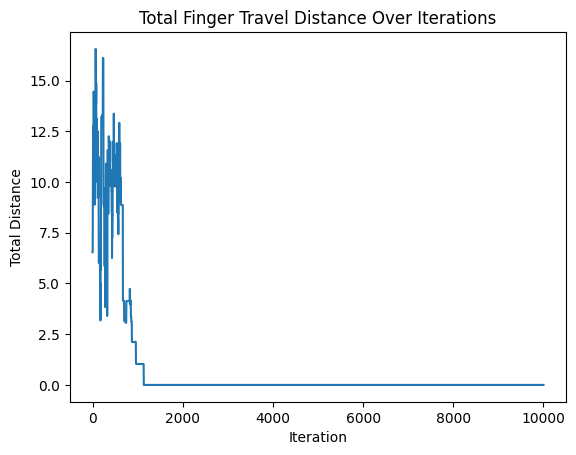

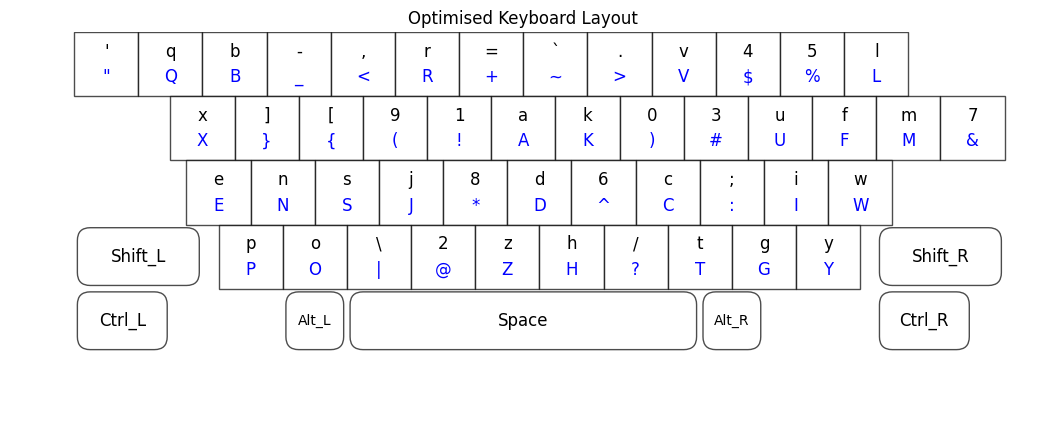

In [8]:
if __name__ == "__main__":
    input_text = input("Enter the input text:")
    initial_temp = 1000
    cooling_rate = 0.99
    iterations = 10000    # Please change the number of iterations here, if needed

    best_key_to_chars, best_distance, distances = simulated_annealing(
        input_text,
        keys,
        key_to_chars,
        initial_temp,
        cooling_rate,
        iterations
    )
    
    # Print the best distance achieved
    print("Best Distance Achieved:", best_distance)
    
    # Visualize and print the total distance travelled VS number of iterations
    plot_distance_over_iterations(distances)
    
    # Visualize and print the optimized keyboard layout
    print_keyboard_layout(keys, best_key_to_chars)